In [1]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


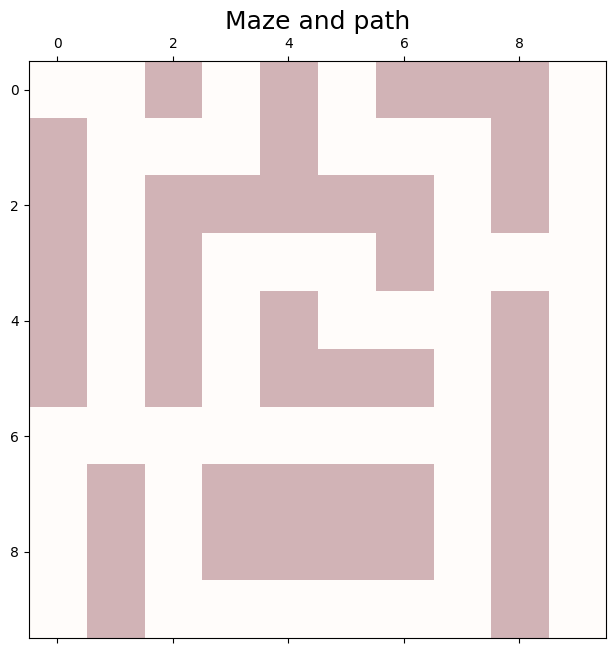

Made EGreedy
800
746
200
438
2254
4900
582
1314
2496
186
2054
1858
828
1058
5014
Made EGreedy
1696
1096
444
1340
828
892
876
932
734
2084
1436
1246
3004
1238
2478
5116
844
1184
2012
Made EGreedy
998
1262
1668
312
640
456
730
516
746
2700
884
788
1442
1106
2028
850
2746
1460
1558
564
1404
2672
830
702
Made EGreedy
1326
554
1682
882
926
370
3160
1188
630
828
1814
360
2126
3812
398
988
100
1248
650
1182
1118
1474
1930
1042
Made EGreedy
1040
1506
290
2678
218
222
576
2470
1206
464
1510
138
768
3858
224
274
682
2334
1726
2388
358
1292
1052
218
1956
Made EGreedy
388
2434
462
1062
516
646
612
5152
1508
1006
508
918
2946
2656
1700
1648
174
432
2008
488
412
202
508
790
Made EGreedy
1884
420
1380
928
968
182
1480
500
1640
716
1356
748
4070
370
1484
1564
234
1034
1574
198
1726
642
1148
3242
Made EGreedy
368
3568
764
412
1710
400
844
272
488
1088
280
656
1852
1096
1248
1078
656
1124
552
2472
340
96
330
218
1778
922
1832
762
328
588
172
724
290
Made EGreedy
2170
644
1380
690
364
1536
322
1932
804
4

In [30]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()
# Set the reward at the bottom right to 10
maze.set_reward(maze.get_state(9, 9), 10)

steps_per_iter = []

for i in range(30):
    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    eps = 0.1

    stop = False
    iter = 30000

    steps = 0
    iterations = 0

    # keep learning until you decide to stop
    while not stop:
        if robot.get_state(maze).x  == 9 and robot.get_state(maze).y == 9:
            steps += robot.nr_of_actions_since_reset
            iterations += 1
            robot.reset()
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        #print(current_action, robot.get_state(maze))
        
        current_state = robot.get_state(maze)
        r = maze.get_reward(current_state)
        state_next = robot.do_action(action=current_action, maze=maze)
        possible_actions = maze.get_valid_actions(robot)
        alfa = 0.2
        gamma = 0.9

        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        iter -= 1
        if iter == 0:
            break
        #robot.do_action(action=current_action, maze=maze)
        # TODO implement the action selection and learning cycle
        # TODO figure out a stopping criterion
    steps /= iterations
    steps_per_iter.append(steps)

[1648.5333333333333, 1551.578947368421, 1210.9166666666667, 1241.1666666666667, 1177.92, 1215.6666666666667, 1228.6666666666667, 888.1212121212121, 1129.3846153846155, 1419.904761904762, 1755.625, 1185.44, 1132.923076923077, 1185.9166666666667, 890.4848484848485, 1240.75, 1187.6, 1874.625, 1218.695652173913, 1464.3157894736842, 1352.909090909091, 989.8620689655172, 1562.1052631578948, 1364.421052631579, 1482.2, 1080.2307692307693, 1426.3809523809523, 1153.2307692307693, 1251.391304347826, 1184.96]


(0.0, 3749.25)

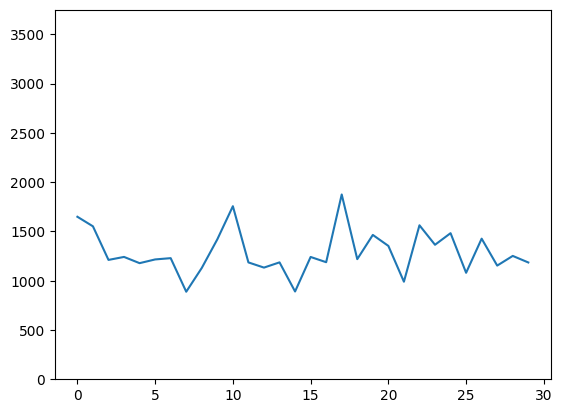

In [40]:
import matplotlib.pyplot as plt
import numpy as np

print(steps_per_iter)

plt.plot(range(len(steps_per_iter)), steps_per_iter)
plt.ylim(0, np.max(steps_per_iter) * 2)